<a href="https://colab.research.google.com/github/lionheart7dec/playing_with_mnist/blob/master/DCGANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test)= mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


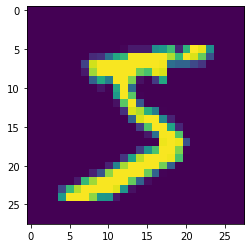

In [4]:
plt.imshow(x_train[0])

In [0]:
x_train = x_train/255

In [0]:
x_train = x_train.reshape(-1,28, 28, 1) * 2.-1.

In [7]:
x_train.min()

-1.0

In [0]:
only_zeroes = x_train[y_train==0]

In [9]:
only_zeroes.shape

(5923, 28, 28, 1)

In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape, Flatten, Dropout, LeakyReLU, BatchNormalization, Conv2D, Conv2DTranspose
from tensorflow.keras.models import Sequential

In [0]:
np.random.seed(42)
tf.random.set_seed(42)

codings_size = 100

In [0]:
generator = Sequential()
generator.add(Dense(7 * 7 * 128, input_shape = [codings_size]))
generator.add(Reshape([7, 7, 128]))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(64, kernel_size = 5, strides = 2, padding='same', activation = 'relu'))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(1, kernel_size = 5, strides = 2, padding='same', activation = 'tanh'))

In [0]:
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size= 5, strides=2, padding= 'same', activation=LeakyReLU(0.3), input_shape = [28, 28, 1]))
discriminator.add(Dropout(0.5))
discriminator.add(Conv2D(128, kernel_size= 5, strides=2, padding= 'same', activation=LeakyReLU(0.3)))
discriminator.add(Dropout(0.5))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation = 'sigmoid'))

In [0]:
GAN = Sequential([generator, discriminator])

In [0]:
discriminator.compile(loss = 'binary_crossentropy', optimizer = 'adam')
discriminator.trainable = False

In [0]:
GAN.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [0]:
batch_size = 32

In [0]:
my_data = only_zeroes

In [0]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size = 1000)

In [29]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [0]:
dataset = dataset.batch(batch_size, drop_remainder = True).prefetch(1)

In [0]:
epochs = 20

In [32]:
GAN.layers[0].layers

In [33]:
GAN.layers[0].summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 6272)              633472    
_________________________________________________________________
reshape_5 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
conv2d_transpose_5 (Conv2DTr (None, 14, 14, 64)        204864    
_________________________________________________________________
batch_normalization_6 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_transpose_6 (Conv2DTr (None, 28, 28, 1)         1601      
Total params: 840,705
Trainable params: 840,321
Non-trainable params: 384
______________________________________________

In [34]:
GAN.layers[1].summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 14, 14, 64)        1664      
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 6273      
Total params: 212,865
Trainable params: 0
Non-trainable params: 212,865
________________________________________________

In [36]:
generator, discriminator = GAN.layers

for epoch in range(epochs):
  print(f'Currently on Epoch {epoch+1}')
  i=0

  for x_batch in dataset:

    i = i+1

    if i%20 ==0:
      print(f"\tCurrently on batch number {i} of {len(my_data)//batch_size}")

    # Discrimator

    noise = tf.random.normal(shape =[batch_size, codings_size])

    gen_images = generator(noise)

    x_fake_vs_real = tf.concat([gen_images, tf.dtypes.cast(x_batch, tf.float32)], axis = 0)

    y1 = tf.constant([[0.0]]*batch_size + [[1.0]]*batch_size)

    discriminator.trainable = True

    discriminator.train_on_batch(x_fake_vs_real, y1)


    # Training Generating
    noise = tf.random.normal(shape=[batch_size, codings_size])
    y2 = tf.constant( [[1.0]]*batch_size)
    discriminator.trainable = False
    GAN.train_on_batch(noise, y2)

print('Training Complete')

Currently on Epoch 1
	Currently on batch number 20 of 185
	Currently on batch number 40 of 185
	Currently on batch number 60 of 185
	Currently on batch number 80 of 185
	Currently on batch number 100 of 185
	Currently on batch number 120 of 185
	Currently on batch number 140 of 185
	Currently on batch number 160 of 185
	Currently on batch number 180 of 185
Currently on Epoch 2
	Currently on batch number 20 of 185
	Currently on batch number 40 of 185
	Currently on batch number 60 of 185
	Currently on batch number 80 of 185
	Currently on batch number 100 of 185
	Currently on batch number 120 of 185
	Currently on batch number 140 of 185
	Currently on batch number 160 of 185
	Currently on batch number 180 of 185
Currently on Epoch 3
	Currently on batch number 20 of 185
	Currently on batch number 40 of 185
	Currently on batch number 60 of 185
	Currently on batch number 80 of 185
	Currently on batch number 100 of 185
	Currently on batch number 120 of 185
	Currently on batch number 140 of 185

In [37]:
noise = tf.random.normal(shape = [10, codings_size])
noise.shape

TensorShape([10, 100])

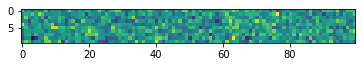

In [38]:
plt.imshow(noise)

In [0]:
images = generator(noise)

In [40]:
images.shape

TensorShape([10, 28, 28, 1])

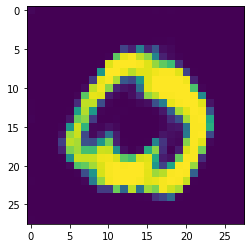

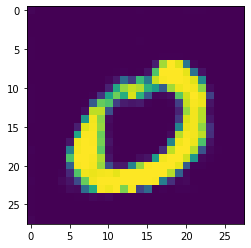

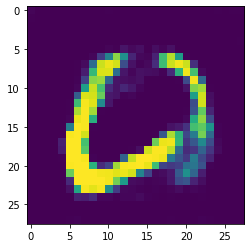

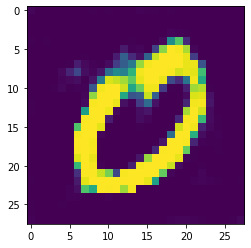

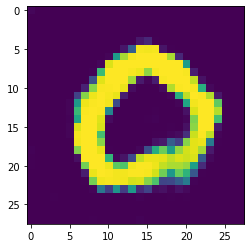

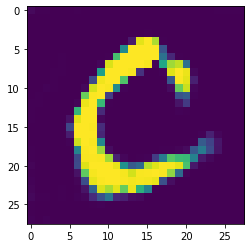

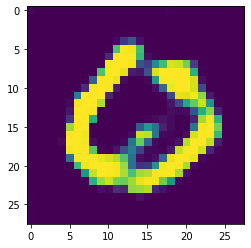

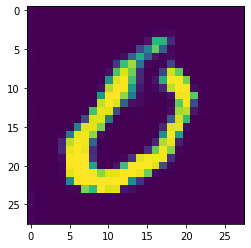

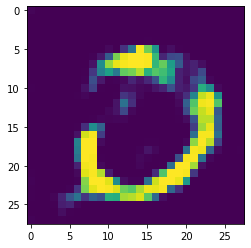

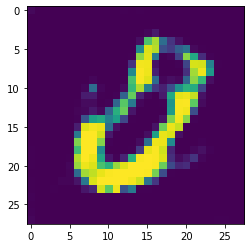

In [42]:
for image in images:
  plt.imshow(image.numpy().reshape(28, 28))
  plt.show()